# Taller de Regresión Lineal Orientado al Negocio

Este taller se centra en **cómo** un negocio (por ejemplo, un e-commerce) puede **interpretar** y **aprovechar** los resultados de la Regresión Lineal para **tomar decisiones**.

## Contexto de Negocio
Imagina que eres el/la **gerente de marketing** de una tienda en línea. Tienes un conjunto de datos con el comportamiento de los clientes y la **cantidad anual** que han gastado (`Yearly Amount Spent`). Tu objetivo es:
1. **Identificar** qué factores (tiempo en la app, duración de la sesión, etc.) influyen más en el gasto anual.
2. **Predecir** el gasto anual futuro de los clientes.
3. Traducir estos hallazgos en **acciones concretas** que aumenten el gasto de los clientes.

## Datos Disponibles
Se te proporciona un dataset con las columnas:
- **Email**
- **Address**
- **Avatar**
- **Avg. Session Length** (Promedio de duración de la sesión)
- **Time on App** (Tiempo en la App)
- **Time on Website** (Tiempo en el Sitio Web)
- **Length of Membership** (Antigüedad de membresía, en años)
- **Yearly Amount Spent** (Cantidad gastada anualmente)

Tu variable objetivo para predecir es: **Yearly Amount Spent**.

## 1. Carga y Exploración de Datos

### Tarea 1.1: Cargar los datos
1. Crea un DataFrame (por ejemplo, `df`) leyendo el archivo CSV o introduciendo manualmente la tabla que se te proporcionó.
2. Muestra las primeras 5 filas (`df.head()`), la forma (`df.shape`) y los tipos de datos (`df.info()`).

**Pregunta de enfoque de negocio:**
- ¿Qué **insights** iniciales obtienes con solo ver las variables? ¿Cómo podría eso impactar tus **estrategias de marketing**?

In [ ]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/main/Ecommerce%20_Customers.csv

--2025-03-12 17:04:38--  https://github.com/javierherrera1996/lecture_analytics/raw/main/Ecommerce%20_Customers.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/Ecommerce%20_Customers.csv [following]
--2025-03-12 17:04:39--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/Ecommerce%20_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87360 (85K) [text/plain]
Saving to: ‘Ecommerce _Customers.csv’

Ecommerce _Customer 100%[===================>]  85.31K  --.-KB/s    in 0.02s   

2025-03-12 17:04:39 (3.50 MB/s) - ‘Eco

In [ ]:
# EJEMPLO de código:
import pandas as pd

# Supongamos que has guardado tu dataset en un archivo 'data.csv'
df = pd.read_csv('Ecommerce _Customers.csv')
df.head()



,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### Tarea 1.2: Análisis Exploratorio (EDA) Básico
1. Ejecuta `df.describe()` para revisar las estadísticas descriptivas de las variables numéricas.
2. Realiza uno o dos **boxplots** o **histogramas** para visualizar la distribución de:
   - **Avg. Session Length**
   - **Time on App**
   - **Time on Website**
   - **Length of Membership**
   - **Yearly Amount Spent**

**Preguntas de negocio:**
1. Si detectas que, por ejemplo, la gente con **mayor** `Length of Membership` gasta más, ¿qué **estrategias** implementarías para retener y "graduar" a los nuevos clientes a miembros más "antiguos"?
2. Si notas que el **Time on Website** es muy bajo vs. **Time on App**, ¿implica que debas mejorar la experiencia en el sitio web para que la gente pase más tiempo allí?

In [ ]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


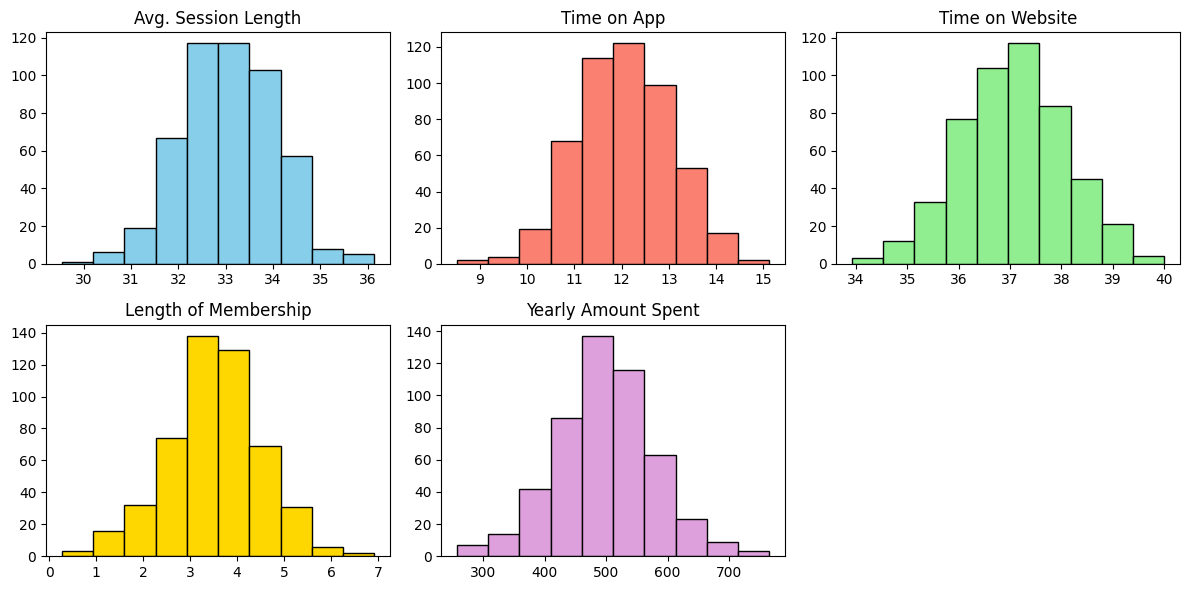

In [ ]:


import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.hist(df['Avg. Session Length'], bins=10, color='skyblue', edgecolor='black')
plt.title('Avg. Session Length')

plt.subplot(2, 3, 2)
plt.hist(df['Time on App'], bins=10, color='salmon', edgecolor='black')
plt.title('Time on App')

plt.subplot(2, 3, 3)
plt.hist(df['Time on Website'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Time on Website')

plt.subplot(2, 3, 4)
plt.hist(df['Length of Membership'], bins=10, color='gold', edgecolor='black')
plt.title('Length of Membership')

plt.subplot(2, 3, 5)
plt.hist(df['Yearly Amount Spent'], bins=10, color='plum', edgecolor='black')
plt.title('Yearly Amount Spent')

plt.tight_layout()
plt.show()


RESPUESTAS:

1. Si los clientes con mayor Length of Membership gastan más, se deben implementar programas de fidelización con recompensas y descuentos exclusivos, además de niveles de membresía que ofrezcan mejores beneficios con el tiempo. También es clave personalizar la comunicación para motivar a los nuevos usuarios a convertirse en clientes leales.

2. Si el Time on Website es bajo frente al Time on App, es importante analizar si las conversiones son mayores en la app, ya que esto podría hacer que la prioridad sea mejorar la app. También se debe revisar qué actividades realizan los usuarios en cada plataforma y si existen problemas específicos en la web que afecten la experiencia.


## 2. Selección de Variables
En este dataset, algunas columnas como **Email**, **Address** o **Avatar** no son útiles directamente para el modelo de regresión.

### Tarea 2.1: Elegir features
- Usarás como variables predictoras (features) las siguientes columnas:
  1. **Avg. Session Length**
  2. **Time on App**
  3. **Time on Website**
  4. **Length of Membership**
- La columna objetivo (target) será **Yearly Amount Spent**.

**Pregunta de negocio**:
- ¿Por qué estas columnas tienen sentido para **explicar** el gasto anual? (Piensa en la lógica, "mientras más tiempo en app, más oportunidades de compra").

In [ ]:

X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

y = df['Yearly Amount Spent']


RESPUESTA:

Son útiles para explicar el gasto anual porque muestran cómo interactúa el cliente con la tienda. Cuanto más tiempo pasa en la app o en el sitio web, más veces ve productos y tiene oportunidades para comprar. Además, la antigüedad de la membresía muestra que el cliente es leal y conoce bien la marca, lo que generalmente lleva a gastar más.

## 3. Dividir el Dataset en Entrenamiento y Prueba
Para evaluar la capacidad de nuestro modelo de generalizar, dividiremos los datos en **train (80%)** y **test (20%)**.

**Pregunta de negocio**:
- ¿Cómo explicarías, en términos empresariales, que "apartamos" datos para prueba y no los usamos en el entrenamiento? ¿Qué importancia tiene para "predecir" clientes futuros?

In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



RESPUESTA:

Separamos datos de prueba para simular clientes "nuevos" y ver si nuestro modelo realmente predice bien, como una prueba final para un equipo de ventas. Si el modelo funciona bien con estos datos desconocidos, tendremos más confianza en usarlo para predecir el comportamiento de clientes reales en el futuro y tomar decisiones de negocio más inteligentes.

## 4. Entrenar el Modelo de Regresión Lineal
1. **Crea** un objeto `LinearRegression()`.
2. **Entrena** el modelo con los datos de entrenamiento.
3. **Obtén** el intercepto y los coeficientes resultantes.

**Pregunta de negocio**:
- Si el coeficiente de `Time on App` es grande y positivo, ¿cómo podrías usar esta información para crear **campañas** o **mejoras** en la aplicación que incentiven al usuario a pasar más tiempo allí?

In [ ]:

from sklearn.linear_model import LinearRegression

lm = LinearRegression()


lm.fit(X_train, y_train)


('Intercepto:', lm.intercept_)
('Coeficientes:', lm.coef_)


('Coeficientes:', array([25.5962591 , 38.78534598,  0.31038593, 61.89682859]))

RESPUESTA:

Cuanto más tiempo en la app está relacionado con un mayor gasto, podemos hacer campañas con notificaciones personalizadas, recompensar a los usuarios por usar la app y ofrecer contenido divertido e interactivo. También podemos mejorar la app, haciéndola más fácil de usar, agregando funciones exclusivas y personalizadas para motivar a los usuarios a pasar más tiempo en ella y, así, gastar más.

## 5. Evaluación del Modelo
1. **Predice** en el conjunto de prueba.
2. Calcula las **métricas** MSE, MAE y R² para verificar la calidad de tu modelo. No profundizaremos en residuos, solo en la idea de si el modelo "le atina" al gasto anual.

**Preguntas de negocio**:
1. ¿Qué interpretas si **R²** es cercano a 0.80 o 0.90? ¿El modelo es “bueno” para tus objetivos?
2. Si el **MAE** es, por ejemplo, 15 USD, ¿es aceptable ese margen de error para tu negocio?

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

predictions = lm.predict(X_test)

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)



RESPUESTAS:
1. Un R² cercano a 0.80 o 0.90 significa que el modelo explica bien las variaciones en el gasto anual, lo que nos ayuda a predecir con precisión y a planificar mejores campañas de marketing.

2. Un MAE de 15 USD significa que nuestras predicciones se desvían, en promedio, por 15 USD. Si este error es aceptable depende del tipo de negocio y de la estrategia. Si estamos trabajando con productos caros o presupuestos grandes para campañas, un error de 15 USD podría ser demasiado alto, pero si no es el caso, podría ser aceptable.


## 6. Interpretación y Aplicación Práctica
1. **Observa** los coeficientes resultantes: ¿qué variable es la más influyente? ¿Cómo impacta eso en tu estrategia de negocios?
2. **Propuestas** de acción:
   - Si `Time on App` es el que más incide, podrías **invertir** más en mejoras de la app.
   - Si `Length of Membership` está ligado a más gasto, podrías **fidelizar** a los nuevos clientes con promociones.

**Preguntas de negocio**:
1. ¿Cómo comunicarías estos resultados a un equipo directivo que no maneja detalles estadísticos?
2. ¿Qué **acciones concretas** aplicarías para aumentar el gasto anual de los clientes, basándote en los coeficientes del modelo?

In [ ]:
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': lm.coef_})

most_influential_variable = coefficients.loc[coefficients['Coefficient'].abs().idxmax(), 'Variable']

if most_influential_variable == 'Time on App':
    # Add code here to execute if most_influential_variable is 'Time on App'
    pass  # This is a placeholder, replace with your desired action

elif most_influential_variable == 'Length of Membership':
    # Add code here to execute if most_influential_variable is 'Length of Membership'
    pass  # This is a placeholder, replace with your desired action

elif most_influential_variable == 'Avg. Session Length':
    # Add code here to execute if most_influential_variable is 'Avg. Session Length'
    pass  # This is a placeholder, replace with your desired action

elif most_influential_variable == 'Time on Website':
    # Add code here to execute if most_influential_variable is 'Time on Website'
    pass  # This is a placeholder, replace with your desired action




RESPUESTAS:

1. Se ha analizado el comportamiento de los clientes para entender qué los hace gastar más. Descubrimos que el factor más importante es [Nombre de la variable más influyente, por ejemplo, 'Tiempo en la App'], ya que, en general, cuanto más tiempo pasan en la app, más compran. Otros factores que también influyen son [Menciona otras variables con impacto, por ejemplo, 'la antigüedad de la membresía']. Con esta información, podemos diseñar estrategias más efectivas para aumentar las compras.

2. Para aumentar el gasto, debemos centrarnos en lo que más influye. Si el 'Tiempo en la App' es lo más importante, hagamos que la app sea más atractiva con contenido exclusivo y ofertas. Si la 'Antigüedad de la membresía' cuenta, premiemos a los clientes leales con un programa de recompensas. Si la 'Duración de la sesión' es clave, hagamos más fácil comprar en la tienda. Y si el 'Tiempo en el sitio web' importa, mejoremos su diseño para que sea más fácil de usar. Así, los clientes interactuarán más y gastarán más.

## 7. Conclusión: Caso de Negocio Real
1. Redacta un breve **informe** o explicación final que responda:
   - ¿Qué **variables** explican mejor el gasto anual?
   - ¿Qué recomendaciones propones para aumentar el **Yearly Amount Spent**?
2. **Limitaciones**: Menciona cualquier aspecto que el modelo no cubra (datos no considerados, linealidad asumida, etc.).

Con estos pasos, podrás llevar la **visión estadística** a un **plan de acción** en tu estrategia de negocio.

INFORME

En este análisis, descubrimos que el tiempo que los clientes pasan en la aplicación es lo que más influye en el gasto anual. A medida que los usuarios pasan más tiempo en la app, tienden a gastar más dinero. También notamos que la antigüedad de la membresía juega un papel importante: los clientes más leales, con más tiempo usando la plataforma, suelen gastar más.

Para aumentar el gasto de los clientes, proponemos algunas acciones. Primero, sería útil mejorar la experiencia en la aplicación, añadiendo nuevas funciones, ofreciendo contenido exclusivo y personalizando la experiencia para que los usuarios se sientan más cómodos y atraídos a pasar más tiempo en ella. También, fortalecer el programa de fidelización sería clave. Premiar a los clientes leales con descuentos exclusivos, beneficios especiales y acceso anticipado a productos puede hacer que sigan comprando más. Por último, optimizar la tienda online, tanto en la web como en la app, facilitaría la compra de productos, mejoraría la navegación y haría que los usuarios disfruten más del proceso de compra.

Es importante tener en cuenta que este modelo se basa en los datos actuales y supone que hay una relación directa entre las variables. Sin embargo, factores externos como la situación económica, la competencia o los cambios en los gustos de los clientes también pueden afectar el gasto y no están considerados en el modelo. Además, sería útil analizar otras variables, como el historial de compras, la ubicación geográfica o la información demográfica de los clientes, para obtener un análisis más completo.

# Resumen de las Tareas
1. **EDA Rápido**: Cargar y describir el dataset.
2. **Selección de Variables**: Explicar por qué se usan las columnas numéricas y se ignoran Email/Address.
3. **Entrenamiento**: Ajustar el modelo de Regresión con `Avg. Session Length`, `Time on App`, `Time on Website`, `Length of Membership`.
4. **Evaluación**: Observar MSE, MAE, R².
5. **Interpretación**: Explicar cómo usaría el negocio estos resultados.

## ¡Listo para Analizar!
Sigue estos pasos, responde las **preguntas de negocio** y, sobre todo, **conecta** tus hallazgos con **acciones** en el mundo real.

> **Nota**: Puedes consultar documentación o herramientas como ChatGPT si lo requieres, pero recuerda que las **respuestas** deben ser **tuyas**, pensando en el contexto de negocio y la lógica detrás de los coeficientes. ¡Éxito!